In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [50]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [23]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station



In [18]:
# Create our session (link) from Python to the DB
session = Session(engine)



# Exploratory Precipitation Analysis

In [34]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()



('2017-08-23',)

Query Date: 2016-08-23


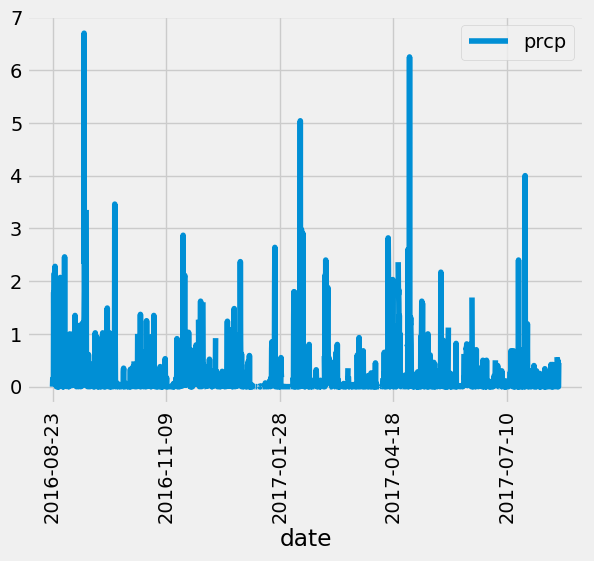

In [120]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.

query_date= dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date:", query_date)

# Perform a query to retrieve the data and precipitation scores

date_prcp =session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date >= '2016-08-23').\
    order_by(Measurement.date).all()




# Save the query results as a Pandas DataFrame and set the index to the date column

date_prcp_df = pd.DataFrame(date_prcp, columns=['date', 'prcp'])
date_prcp_df.set_index('date', inplace=True)

# Sort the dataframe by date
date_prcp_df = date_prcp_df.sort_values(["date"], ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data

date_prcp_df.plot(rot=90)
plt.show()



In [122]:
# Use Pandas to calcualte the summary statistics for the precipitation data
print(date_prcp_df['prcp'].describe())

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64


# Exploratory Station Analysis

In [127]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.name).count()

9

In [152]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations= session.query(Measurement.station,func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [153]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]
temp_stats = session.query(*sel).filter(Measurement.station == active_stations[0][0]).all()
temp_stats

[(54.0, 85.0, 71.66378066378067)]

<AxesSubplot:ylabel='Frequency'>

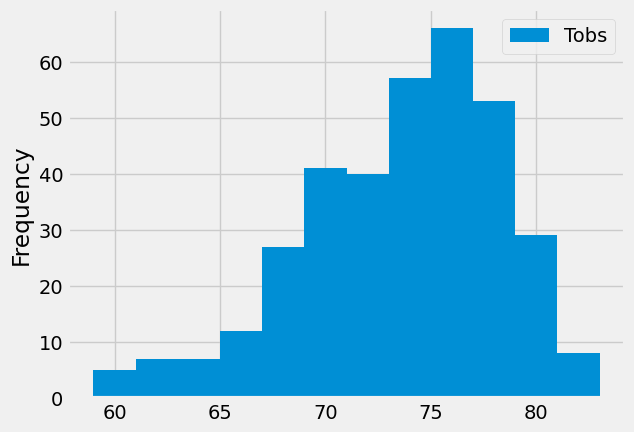

In [154]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_tobs = session.query(Measurement.tobs).filter(Measurement.station == active_stations[0][0]).\
    filter(Measurement.date >= query_date).all()
tobs_df = pd.DataFrame(year_tobs, columns=["Tobs"])
tobs_df.plot.hist(bins=12)

# Close session

In [155]:
# Close Session
session.close()